# Bigram

In a character-level bigram model, the "tokens" are individual characters rather than words. It predicts the likelihood of a character based on the preceding character. For example, in the string "hello", the bigrams would be "he", "el", "ll", and "lo".

## Introduction

First, it's crucial to grasp how to interpret the data. In this scenario, we're working with a .txt file containing words. In a bigram model, the model's input consists of two consecutive characters. This implies that we must construct this information accordingly. Our goal is to extract the statistical information inherent in our data. To achieve this, we'll first need to compile the statistical data, which will then be input into the neural network. Our objective is to ascertain the distribution of character pairs across all the words. Let's begin with a basic implementation in Python, and subsequently, we'll introduce PyTorch to facilitate easier handling of information within a tensor.

In [2]:
from makemore.config import RAW_DATA_DIR, PROCESSED_DATA_DIR
print(f"RAW_DATA_DIR: {RAW_DATA_DIR}")
print(f"PROCESSED_DATA_DIR: {PROCESSED_DATA_DIR}")

2024-06-14 20:45:12.515 | INFO     | makemore.config:<module>:11 - PROJ_ROOT path is: /home/linx/code_workspace/makemore


RAW_DATA_DIR: /home/linx/code_workspace/makemore/data/raw
PROCESSED_DATA_DIR: /home/linx/code_workspace/makemore/data/processed


In [3]:
# Download the dataset
!python ../makemore/dataset.py

2024-06-14 20:45:13.277 | INFO     | makemore.config:<module>:11 - PROJ_ROOT path is: /home/linx/code_workspace/makemore
2024-06-14 20:45:13.284 | INFO     | __main__:main:22 - Downloading dataset...
  0%|                                                     | 0/1 [00:00<?, ?it/s]
╭───────────────────── Traceback (most recent call last) ──────────────────────╮
│ /home/linx/code_workspace/makemore/env/lib/python3.10/site-packages/urllib3/ │
│ connection.py:198 in _new_conn                                               │
│                                                                              │
│   195 │   │   :return: New socket connection.                                │
│   196 │   │   """                                                            │
│   197 │   │   try:                                                           │
│ ❱ 198 │   │   │   sock = connection.create_connection(                       │
│   199 │   │   │   │   (self._dns_host, self.port),                   

In [4]:
DATASET_NAME = "names.txt"

# Read words
with open(RAW_DATA_DIR / DATASET_NAME, "r") as names_file:
    names = names_file.readlines()

print(names[:10])

# Remove the \n from all the names
names = [name[:-1] for name in names]

names[:10]

['emma\n', 'olivia\n', 'ava\n', 'isabella\n', 'sophia\n', 'charlotte\n', 'mia\n', 'amelia\n', 'harper\n', 'evelyn\n']


['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [5]:
# Store all the frequency
bigram_freq = {}
for name in names:
    s_name = ["<S>"] + list(name) + ["<E>"] # Special name with start and end char
    for ch1, ch2 in zip(s_name, s_name[1:]):
        key = (ch1, ch2)
        bigram_freq[key] = bigram_freq.get(key, 0) + 1

sorted(bigram_freq, key=lambda k: bigram_freq[k], reverse=True)

[('n', '<E>'),
 ('a', '<E>'),
 ('a', 'n'),
 ('<S>', 'a'),
 ('e', '<E>'),
 ('a', 'r'),
 ('e', 'l'),
 ('r', 'i'),
 ('n', 'a'),
 ('<S>', 'k'),
 ('l', 'e'),
 ('e', 'n'),
 ('l', 'a'),
 ('m', 'a'),
 ('<S>', 'm'),
 ('a', 'l'),
 ('i', '<E>'),
 ('l', 'i'),
 ('i', 'a'),
 ('<S>', 'j'),
 ('o', 'n'),
 ('h', '<E>'),
 ('r', 'a'),
 ('a', 'h'),
 ('h', 'a'),
 ('y', 'a'),
 ('i', 'n'),
 ('<S>', 's'),
 ('a', 'y'),
 ('y', '<E>'),
 ('e', 'r'),
 ('n', 'n'),
 ('y', 'n'),
 ('k', 'a'),
 ('n', 'i'),
 ('r', 'e'),
 ('<S>', 'd'),
 ('i', 'e'),
 ('a', 'i'),
 ('<S>', 'r'),
 ('a', 'm'),
 ('l', 'y'),
 ('<S>', 'l'),
 ('<S>', 'c'),
 ('<S>', 'e'),
 ('j', 'a'),
 ('r', '<E>'),
 ('n', 'e'),
 ('l', 'l'),
 ('i', 'l'),
 ('i', 's'),
 ('l', '<E>'),
 ('<S>', 't'),
 ('<S>', 'b'),
 ('d', 'a'),
 ('s', 'h'),
 ('d', 'e'),
 ('e', 'e'),
 ('m', 'i'),
 ('s', 'a'),
 ('s', '<E>'),
 ('<S>', 'n'),
 ('a', 's'),
 ('y', 'l'),
 ('e', 'y'),
 ('o', 'r'),
 ('a', 'd'),
 ('t', 'a'),
 ('<S>', 'z'),
 ('v', 'i'),
 ('k', 'e'),
 ('s', 'e'),
 ('<S>', 'h'),
 ('

Since machines have difficulty processing strings effectively, we need to encode each character as a number to create a more flexible dataset.

In [6]:
# Use one-hot encoding for each char. 
# In latin alphabet there are 26 letters
alphabet = "qwertyuiopasdfghjklzxcvbnm"
encoder = {}
for i, char in enumerate(alphabet):
    encoder[char] = i

# Add special chars: <S> and <E>
encoder["<S>"], encoder["<E>"] = 26, 27

encoder

{'q': 0,
 'w': 1,
 'e': 2,
 'r': 3,
 't': 4,
 'y': 5,
 'u': 6,
 'i': 7,
 'o': 8,
 'p': 9,
 'a': 10,
 's': 11,
 'd': 12,
 'f': 13,
 'g': 14,
 'h': 15,
 'j': 16,
 'k': 17,
 'l': 18,
 'z': 19,
 'x': 20,
 'c': 21,
 'v': 22,
 'b': 23,
 'n': 24,
 'm': 25,
 '<S>': 26,
 '<E>': 27}

# Pytorch Implementation

Following this introduction, the final code will be implemented using PyTorch, a Python library designed to streamline and accelerate the implementation and deployment of deep learning models.

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Generate an empty tensor
size = (len(encoder), len(encoder))
names_tensor = torch.zeros(size)

# Fill the tensor
for name in names:
    s_name = ["<S>"] + list(name) + ["<E>"]
    for ch1, ch2 in zip(s_name, s_name[1:]):
        i_ch1 = encoder[ch1]
        i_ch2 = encoder[ch2]
        names_tensor[i_ch1, i_ch2] += 1

The use of `"S"` and `"E"` is not the best practice. It is better to use `"."` as both the starting and ending character.

In [9]:
# Delete S and E
del encoder["<S>"], encoder["<E>"]
encoder["."] = 26

In [10]:
# Generate an empty tensor
size = (len(encoder), len(encoder))
names_tensor = torch.zeros(size)

# Fill the tensor
for name in names:
    s_name = ["."] + list(name) + ["."]
    for ch1, ch2 in zip(s_name, s_name[1:]):
        i_ch1 = encoder[ch1]
        i_ch2 = encoder[ch2]
        names_tensor[i_ch1, i_ch2] += 1

Let's now plot the tensor to understand which character pairs are the most common.

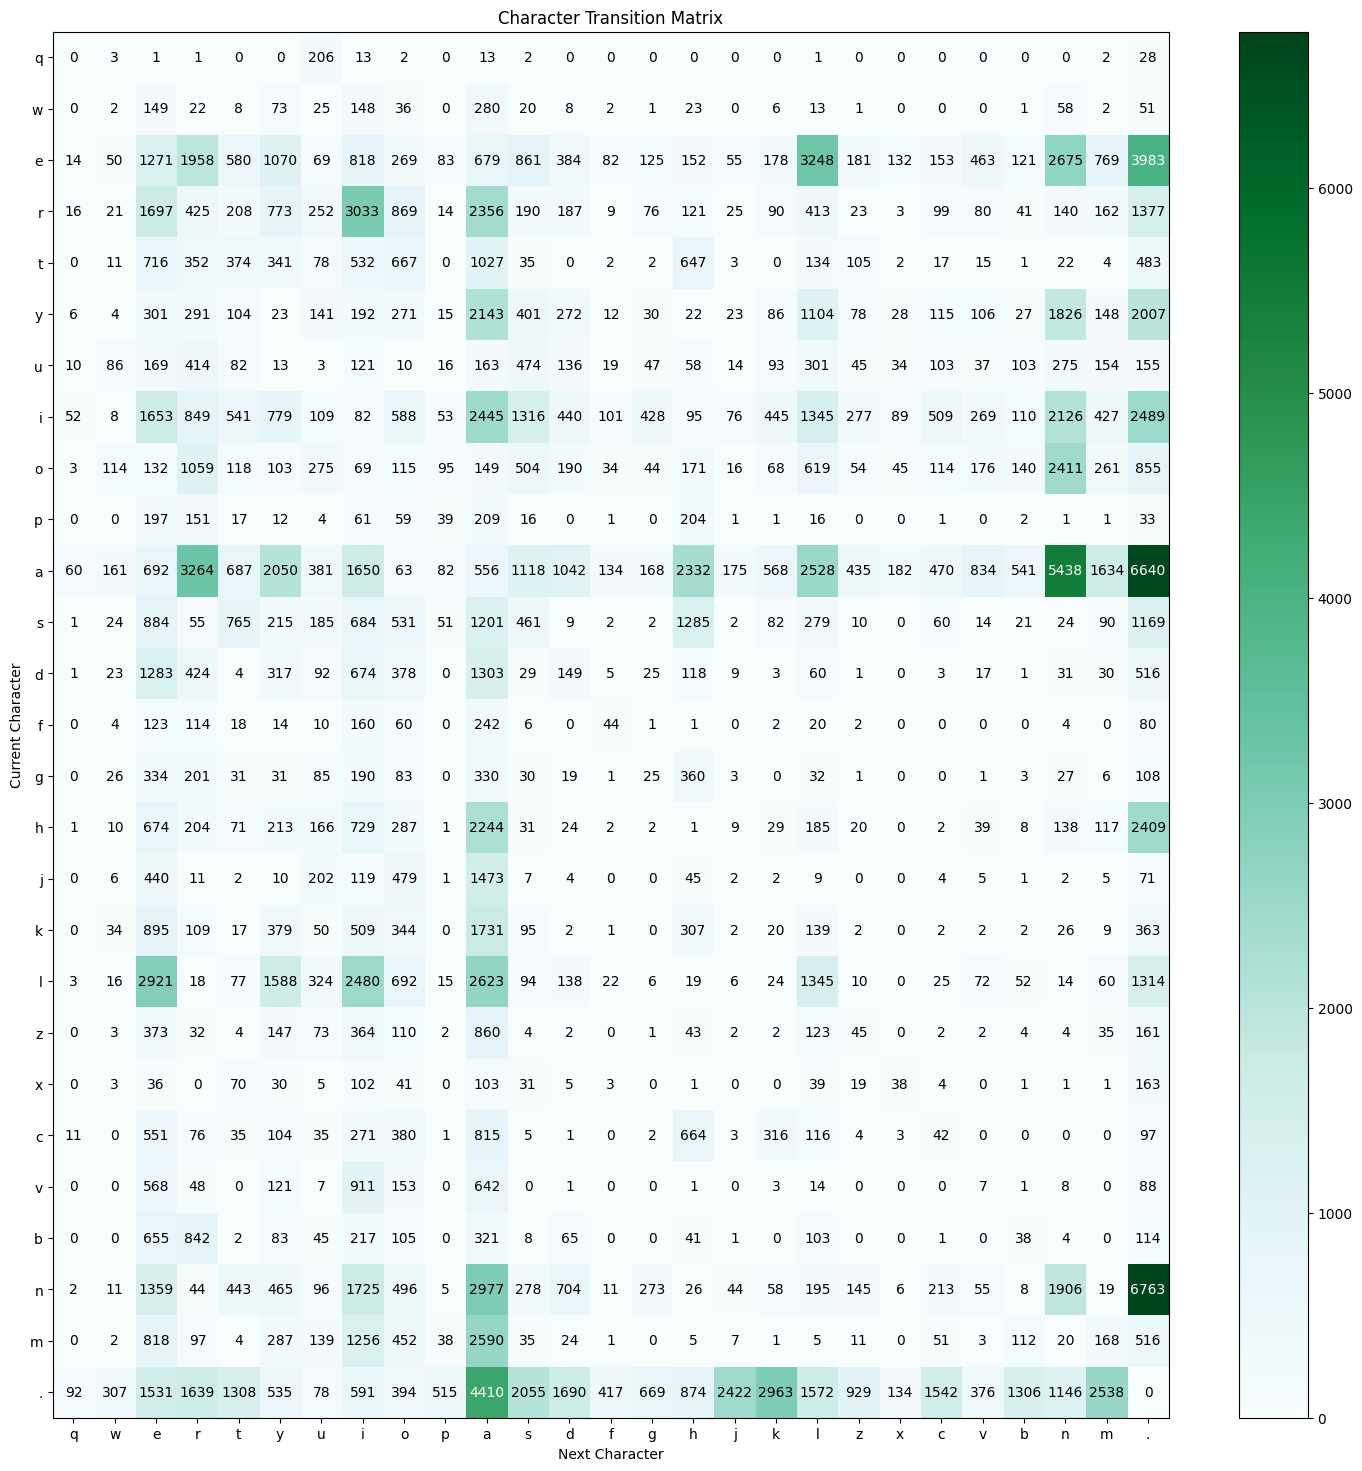

In [11]:
numpy_array = names_tensor.numpy()

plt.figure(figsize=(18, 18))
plt.imshow(numpy_array, cmap='BuGn', aspect='auto')
plt.colorbar()
plt.xticks(ticks=np.arange(len(encoder)), labels=list(encoder.keys()))
plt.yticks(ticks=np.arange(len(encoder)), labels=list(encoder.keys()))
plt.title('Character Transition Matrix')
plt.xlabel('Next Character')
plt.ylabel('Current Character')

# Annotate each cell with the numeric value
for i in range(len(encoder)):
    for j in range(len(encoder)):
        plt.text(j, i, int(numpy_array[i, j]), 
                 ha='center', va='center', 
                 color='white' if numpy_array[i, j] > numpy_array.max() / 2 else 'black')

plt.show()

It is interesting to see that the matrix we obtain can be easily converted into a distribution of the most probable next characters. By normalizing the rows (summing each row and dividing each element by that sum), we obtain these distributions. This information can already be used as model parameters, even if not as advanced as neural networks.

To correctly understand PyTorch, I will introduce the "broadcasting rule." This rule states that a computation between two tensors is possible only if their sizes are the same or one of them is 1 or None. Here are some examples:

- **(24, 24) x (1, 24):** This is possible since the pair (24, 1) is valid and (24, 24) is also valid. PyTorch will stretch the row matrix to make it (24, 24), then run an element-wise operation.
- **(23, 22) x (22):** First, we need to move all the numbers to the right to obtain (23, 22) x (1, 22). The computation is possible as PyTorch will match 1 with 23.

In [12]:
# Compute the probability matrix.
# We want to divide each element by the sum sum the rows, so to correctly strech
# the tensor we need in output a column tensor (27, 1). We need to put keepdim = True
# P = names_tensor / names_tensor.sum(dim=1, keepdim=True) # Less efficient, since will compute a new matrix
P = names_tensor.float()
P /= P.sum(dim=1, keepdim=True)

Let's reprint the matrix to verify that we computed it correctly. Note that the sum of all rows needs to be one!

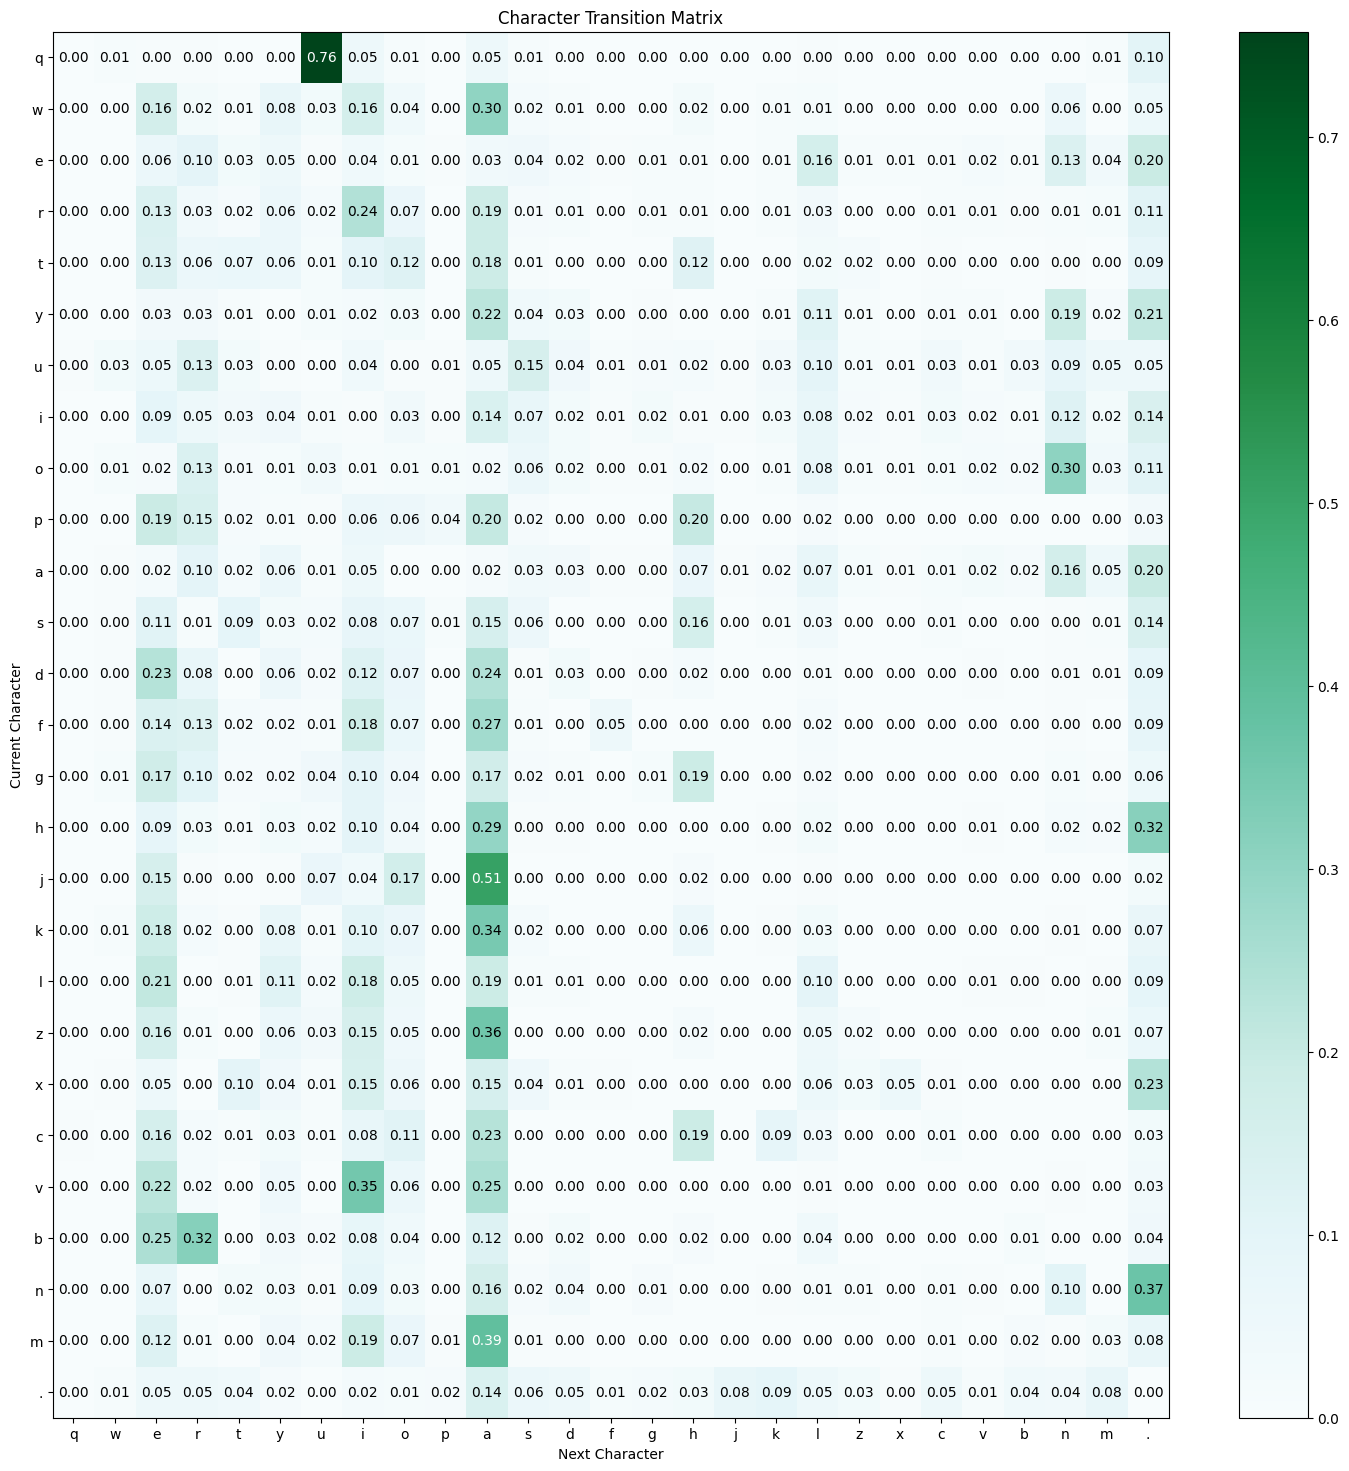

In [13]:
numpy_array = P.numpy()

plt.figure(figsize=(18, 18))
plt.imshow(numpy_array, cmap='BuGn', aspect='auto')
plt.colorbar()
plt.xticks(ticks=np.arange(len(encoder)), labels=list(encoder.keys()))
plt.yticks(ticks=np.arange(len(encoder)), labels=list(encoder.keys()))
plt.title('Character Transition Matrix')
plt.xlabel('Next Character')
plt.ylabel('Current Character')

# Annotate each cell with the numeric value
for i in range(len(encoder)):
    for j in range(len(encoder)):
        plt.text(j, i, f"{numpy_array[i, j]:.2f}", 
                 ha='center', va='center', 
                 color='white' if numpy_array[i, j] > numpy_array.max() / 2 else 'black')

plt.show()

The computation is correct since the sum of each row in the matrix is 1!

In [14]:
P.sum(dim=1) # We do not need keepdim in this case

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

We can now use this information to generate names. These statistical data can serve as model parameters in a way.

In [15]:
decoder = {v: k for k, v in encoder.items()}
decoder 

{0: 'q',
 1: 'w',
 2: 'e',
 3: 'r',
 4: 't',
 5: 'y',
 6: 'u',
 7: 'i',
 8: 'o',
 9: 'p',
 10: 'a',
 11: 's',
 12: 'd',
 13: 'f',
 14: 'g',
 15: 'h',
 16: 'j',
 17: 'k',
 18: 'l',
 19: 'z',
 20: 'x',
 21: 'c',
 22: 'v',
 23: 'b',
 24: 'n',
 25: 'm',
 26: '.'}

In [16]:
i_ch = 26
while True:
    print(decoder[i_ch], end="")
    # Sample a random elemement from the first char row
    ch_row = P[i_ch, :]
    i_ch = torch.multinomial(input=ch_row, 
                      num_samples=1, replacement=True).item()
    if i_ch == 26:
        break

.caun

We can now train our model using a prediction algorithm that leverages the power of backpropagation. Our goal is to learn the same output as before, but with greater flexibility to later develop n-gram models.

In [48]:
# Build the dataset
x, y = [], []

for name in names:
    s_name = ["."] + list(name) + ["."]
    s_name = [encoder[ch] for ch in s_name]

    for i_ch1, i_ch2 in zip(s_name, s_name[1:]):
        x.append(i_ch1), y.append(i_ch2)

x = torch.tensor(x)
y = torch.tensor(y)

num_elements = x.nelement()


In [54]:
import torch.nn.functional as F

# Use generators
g = torch.Generator().manual_seed(2147483647)

# Generate a random matrix that we will use to learn the distribution of the chars
W = torch.randn((27, 27), requires_grad=True, generator=g) # We make requires grad True in order to use backpropagation

lr = 50 # learning rate
epochs = 100

for epoch in range(epochs):
    xenc = F.one_hot(x, num_classes=27).float()

    # Forward
    logits = xenc @ W # (n, 27) @ (27, 27) = (n, 27)
    counts = logits.exp()
    probs = counts / counts.sum(dim=1, keepdim=True)
    loss = -(probs[torch.arange(0, num_elements), y].log()).mean() 

    # Zero Grad
    W.grad = None

    # Backward
    loss.backward()

    # Update
    W.data -= lr * W.grad
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch: {epoch}, Loss: {loss}")


Epoch: 9, Loss: 2.69720458984375
Epoch: 19, Loss: 2.57546067237854
Epoch: 29, Loss: 2.532379388809204
Epoch: 39, Loss: 2.5112974643707275
Epoch: 49, Loss: 2.498952865600586
Epoch: 59, Loss: 2.4907515048980713
Epoch: 69, Loss: 2.4848480224609375
Epoch: 79, Loss: 2.480384111404419
Epoch: 89, Loss: 2.476900815963745
Epoch: 99, Loss: 2.4741249084472656


Let's now use this model exclusively for inference!

In [97]:
W = W.detach() # Do not compute the grads, speed the inference

ch = "."
while True:
    # Feed the char
    print(ch, end="")
    i_ch = torch.tensor(encoder[ch])
    x = F.one_hot(i_ch, num_classes=27).float()

    logits = x @ W
    counts = logits.exp()
    probs = counts / counts.sum()

    i_ch = torch.multinomial(probs, num_samples=1, replacement=True).item()
    ch = decoder[i_ch]

    if ch == ".":
        break

.ziar